In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**LOAD AND MERGE DATA**

In [ ]:
# Membaca file dari Google Drive
df1 = pd.read_csv('/content/sample_data/drivers.csv', sep=';')
df2 = pd.read_csv('/content/sample_data/fact_rides.csv', sep=';')
df3 = pd.read_csv('/content/sample_data/users.csv', sep=';')

In [ ]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   driver_id      1000 non-null   int64 
 1   first_name     1000 non-null   object
 2   last_name      1000 non-null   object
 3   email          1000 non-null   object
 4   phone_number   960 non-null    object
 5   car_make       1000 non-null   object
 6   car_model      1000 non-null   object
 7   license_plate  1000 non-null   object
 8   created_at     1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25003 entries, 0 to 25002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ride_id                25000 non-null  float64
 1   customer_id            25000 non-null  float64
 2   driver_id              25000 non-null  float64
 3

In [ ]:
df1.rename({'first_name' : 'first_name_driver',
            'last_name':'last_name_driver',
            'email':'email_driver',
            'phone_number':'phone_number_driver'
            },
           axis = 1, inplace = True)

df2['ride_timestamp'] = pd.to_datetime(df2['ride_date'] + ' ' + df2['ride_time'])

df3.rename({'first_name' : 'first_name_customer',
            'last_name':'last_name_customer',
            'email':'email_customer',
            'phone_number':'phone_number_customer'
            },
           axis = 1, inplace = True)

In [ ]:
combined_df = pd.merge(df2, df1, on='driver_id', how='left')

In [ ]:
combined_df = pd.merge(combined_df, df3, left_on='customer_id', right_on = 'user_id', how='left')

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25003 entries, 0 to 25002
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ride_id                25000 non-null  float64       
 1   customer_id            25000 non-null  float64       
 2   driver_id              25000 non-null  float64       
 3   start_location         25000 non-null  object        
 4   end_location           25000 non-null  object        
 5   city                   25000 non-null  object        
 6   country                25000 non-null  object        
 7   ride_date              25000 non-null  object        
 8   ride_time              25000 non-null  object        
 9   ride_duration_minutes  25000 non-null  float64       
 10  fare_amount            25000 non-null  float64       
 11  ride_distance_miles    25000 non-null  float64       
 12  payment_method         25000 non-null  object        
 13  v


ride_id =  The unique ID for riders

customer_id = The unique ID for customer

driver_id = The unique ID for driver

start_location = Starting point pick-up location

end_location = Pick-up location end point

city = City of origin

country = Country of origin

ride_date = The date of the ride

ride_time = The start time of the ride

ride_duration_minutes = The duration of the ride in minutes

fare_amount = The fare or cost of the ride

ride_distance_miles = The distance of the ride in miles

payment_method = The payment method used

voucher = The voucher code used

rating = The rating given by the customer after the ride is completed

ride_timestamp = The start date and time of the ride

first_name_driver = The first name of the driver

last_name_driver = The last name of the driver

email_driver = The driver's email address

phone_number_driver = The driver's phone number

car_make = The make of the car the driver uses

car_model = The model of the car used by the driver

license_plate = The license plate number of the driver's vehicle

created_at_x = Date and time of driver account creation

user_id = The unique ID of the customer

username = Customer's username

last_name_customer = The last name of the customer

first_name_customer = The first name of the customer

email_customer = The customer's email address

password_hash = Hash of the customer's password

phone_number_customer = The customer's phone number

gender = The gender of the customer

created_at_y = Date and time the customer account was created

In [ ]:
combined_df[['driver_id', 'country', 'gender', 'fare_amount']].sample(30)

,driver_id,country,gender,fare_amount
4234,200.0,Yemen,Male,12.79
16965,590.0,China,Female,84.20
23683,706.0,China,Female,32.91
5156,156.0,Ecuador,Male,19.33
16020,207.0,Cambodia,Male,84.16
1598,302.0,Sweden,Female,8.28
9774,970.0,China,Male,10.80
7695,126.0,Eritrea,Female,72.15
9584,17.0,Portugal,Female,63.34
4801,345.0,Canada,Male,56.59


#**CLEANING AND MANIPULATION DATA**

In [ ]:
# Fungsi untuk menghitung persentase missing values
def missing_values_percentage(df):
    missing_values = df.isnull().sum()  # Menghitung jumlah missing values
    total_values = len(combined_df)               # Menghitung total baris
    missing_percentage = (missing_values / total_values) * 100  # Menghitung persentase
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Menghitung dan menampilkan persentase missing values untuk setiap DataFrame
missing_info_combined = missing_values_percentage(combined_df)

print("Missing Values Info for combined:")
print(missing_info_combined)

Missing Values Info for combined:
                       Missing Values  Percentage
ride_id                             3    0.011999
customer_id                         3    0.011999
driver_id                           3    0.011999
start_location                      3    0.011999
end_location                        3    0.011999
city                                3    0.011999
country                             3    0.011999
ride_date                           3    0.011999
ride_time                           3    0.011999
ride_duration_minutes               3    0.011999
fare_amount                         3    0.011999
ride_distance_miles                 3    0.011999
payment_method                      3    0.011999
voucher                         17456   69.815622
rating                              3    0.011999
ride_timestamp                      3    0.011999
first_name_driver                   3    0.011999
last_name_driver                    3    0.011999
email_driver    

In [ ]:
combined_df.dropna(subset = 'ride_id', inplace = True)

In [ ]:
# check missing values
def missing_values_percentage(df):
    missing_values = df.isnull().sum()  # Menghitung jumlah missing values
    total_values = len(combined_df)               # Menghitung total baris
    missing_percentage = (missing_values / total_values) * 100  # Menghitung persentase
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Calculate and display the percentage of missing values for each DataFrame
missing_info_combined = missing_values_percentage(combined_df)

print("Missing Values Info for combined:")
print(missing_info_combined)

Missing Values Info for combined:
                       Missing Values  Percentage
ride_id                             0       0.000
customer_id                         0       0.000
driver_id                           0       0.000
start_location                      0       0.000
end_location                        0       0.000
city                                0       0.000
country                             0       0.000
ride_date                           0       0.000
ride_time                           0       0.000
ride_duration_minutes               0       0.000
fare_amount                         0       0.000
ride_distance_miles                 0       0.000
payment_method                      0       0.000
voucher                         17453      69.812
rating                              0       0.000
ride_timestamp                      0       0.000
first_name_driver                   0       0.000
last_name_driver                    0       0.000
email_driver    

After checking, there are 3 variables that have missing values

In [ ]:
#change voucher data to no_vouchers
combined_df['voucher'] = combined_df['voucher'].fillna('no_vouchers')

Change the value of vouchers to no vouchers

In [ ]:
#remove data with missing values
combined_df.dropna(subset=['phone_number_driver'], inplace=True)
combined_df.dropna(subset=['phone_number_customer'], inplace=True)

removing rows (data) that have missing values in the column

In [ ]:
# calculate the percentage of missing values
def missing_values_percentage(df):
    missing_values = df.isnull().sum()  # Menghitung jumlah missing values
    total_values = len(combined_df)               # Menghitung total baris
    missing_percentage = (missing_values / total_values) * 100  # Menghitung persentase
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Calculate and display the percentage of missing values for each DataFrame
missing_info_combined = missing_values_percentage(combined_df)

print("Missing Values Info for combined:")
print(missing_info_combined)

Missing Values Info for combined:
                       Missing Values  Percentage
ride_id                             0         0.0
customer_id                         0         0.0
driver_id                           0         0.0
start_location                      0         0.0
end_location                        0         0.0
city                                0         0.0
country                             0         0.0
ride_date                           0         0.0
ride_time                           0         0.0
ride_duration_minutes               0         0.0
fare_amount                         0         0.0
ride_distance_miles                 0         0.0
payment_method                      0         0.0
voucher                             0         0.0
rating                              0         0.0
ride_timestamp                      0         0.0
first_name_driver                   0         0.0
last_name_driver                    0         0.0
email_driver    

after cleaning the data, finally there are no missing values.

In [ ]:
#duplicate checking
combined_df.duplicated().sum()

np.int64(0)

there is no duplicate data

In [ ]:
combined_df.to_csv('combined_data.csv', index=False)

In [ ]:
jumlah_data = len(combined_df)
print(f"Jumlah total data dalam combined_df adalah: {jumlah_data}")

Jumlah total data dalam combined_df adalah: 21031


In [ ]:
display(round(combined_df.describe(),2))

,ride_id,customer_id,driver_id,ride_duration_minutes,fare_amount,ride_distance_miles,rating,ride_timestamp,user_id
count,21031.00,21031.00,21031.00,21031.00,21031.00,21031.00,21031.00,21031,21031.00
mean,4977.29,5506.51,501.57,62.55,52.55,10.30,3.92,2024-07-06 13:39:50.941942784,5506.51
min,0.00,1.00,1.00,5.00,5.00,0.50,1.00,2024-01-01 01:10:00,1.00
25%,2490.00,2750.50,249.00,34.00,28.61,5.40,3.00,2024-04-03 04:47:30,2750.50
50%,4969.00,5480.00,502.00,62.00,52.65,10.30,4.00,2024-07-07 03:41:00,5480.00
75%,7492.00,8298.00,757.00,92.00,76.16,15.20,5.00,2024-10-08 00:31:00,8298.00
max,9999.00,11000.00,1000.00,120.00,99.98,20.00,5.00,2025-01-09 23:44:00,11000.00
std,2886.62,3182.27,289.12,33.60,27.48,5.64,0.92,NaN,3182.27


#EDA

#Distribution of Fare Amount

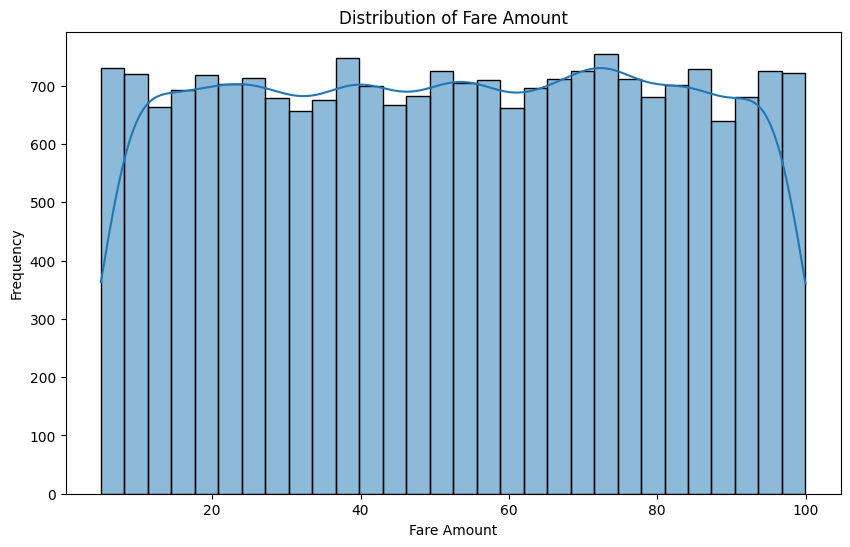

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(combined_df['fare_amount'], bins=30, kde=True)

# Set the title and labels
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

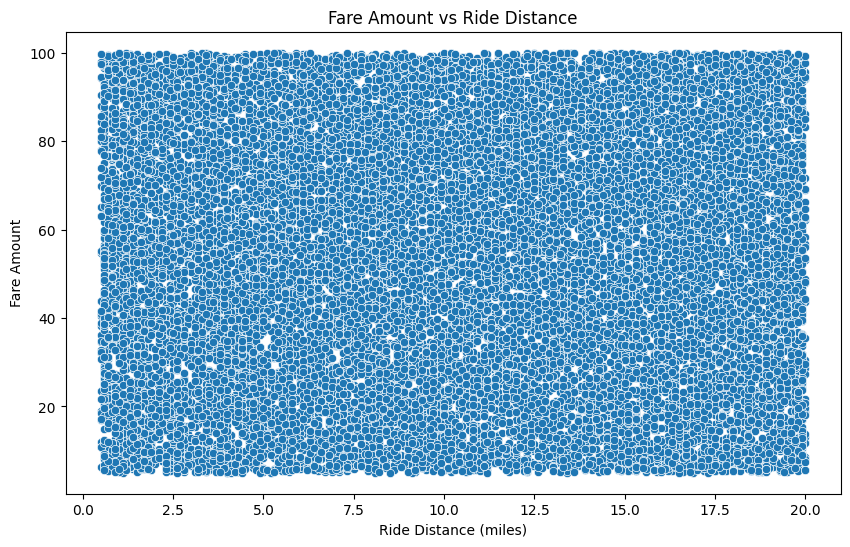

In [ ]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='ride_distance_miles', y='fare_amount', data=combined_df)

# Set the title and labels
plt.title('Fare Amount vs Ride Distance')
plt.xlabel('Ride Distance (miles)')
plt.ylabel('Fare Amount')

# Show the plot
plt.show()

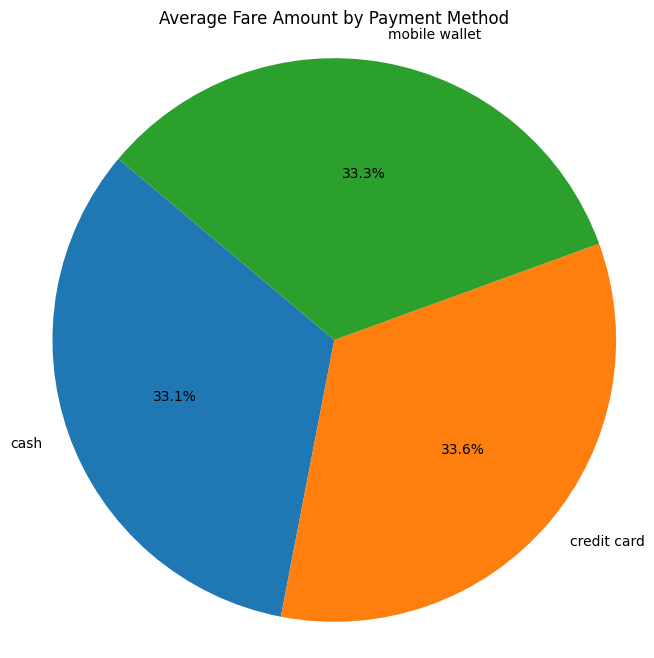

In [ ]:
# Calculate the average fare amount by payment method
avg_fare_payment = combined_df.groupby('payment_method')['fare_amount'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(avg_fare_payment['fare_amount'], labels=avg_fare_payment['payment_method'], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Average Fare Amount by Payment Method')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37066 (\N{CJK UNIFIED IDEOGRAPH-90CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


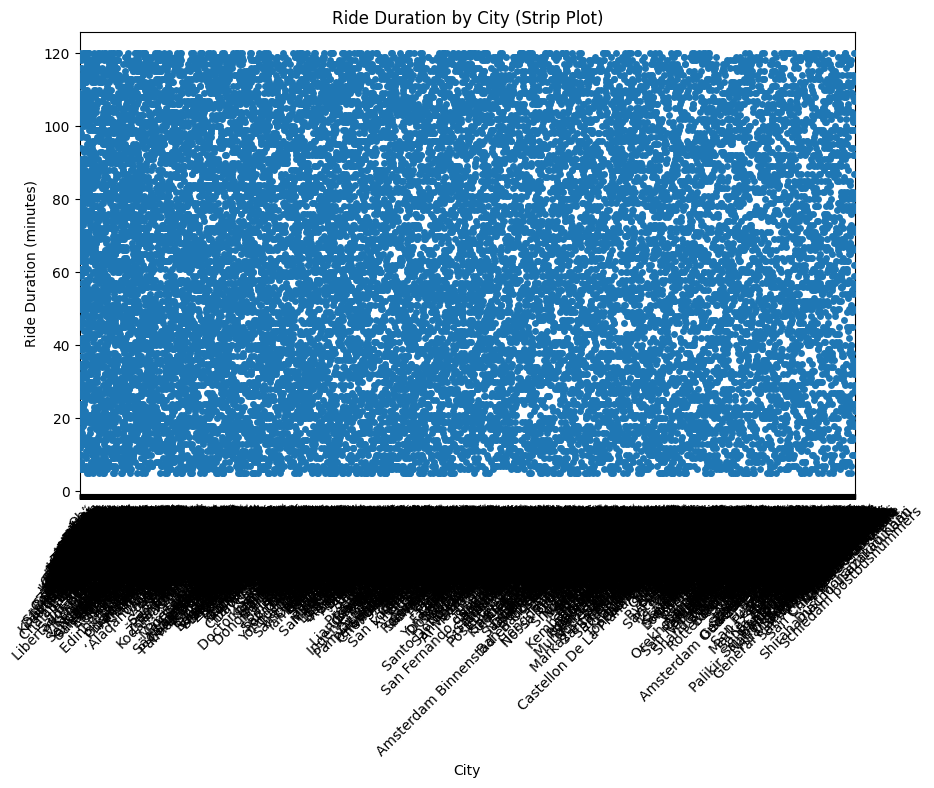

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a strip plot
sns.stripplot(x='city', y='ride_duration_minutes', data=combined_df, jitter=True)

# Set the title and labels
plt.title('Ride Duration by City (Strip Plot)')
plt.xlabel('City')
plt.ylabel('Ride Duration (minutes)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

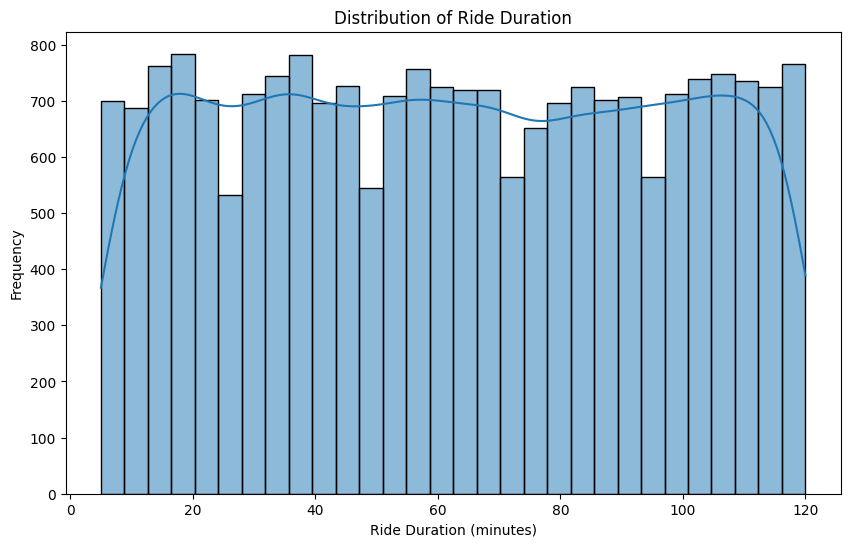

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(combined_df['ride_duration_minutes'], bins=30, kde=True)

# Set the title and labels
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

VISUALIZATION IN EVERY COUNTRY

In [ ]:
rides_per_customer = combined_df['customer_id'].value_counts().reset_index()
rides_per_customer.columns = ['customer_id', 'number_of_rides']

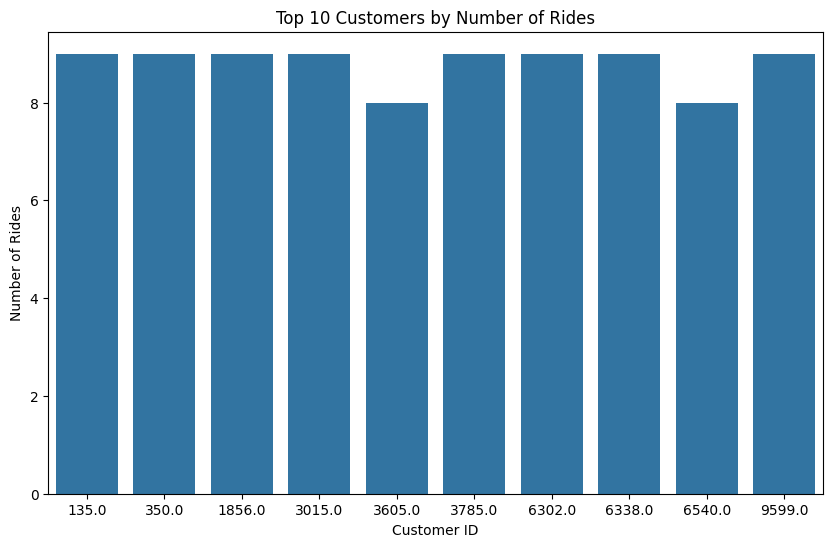

In [ ]:
# Visualisasi jumlah perjalanan per pelanggan
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='number_of_rides', data=rides_per_customer.head(10))  # Tampilkan 10 pelanggan teratas
plt.title('Top 10 Customers by Number of Rides')
plt.xlabel('Customer ID')
plt.ylabel('Number of Rides')
plt.show()


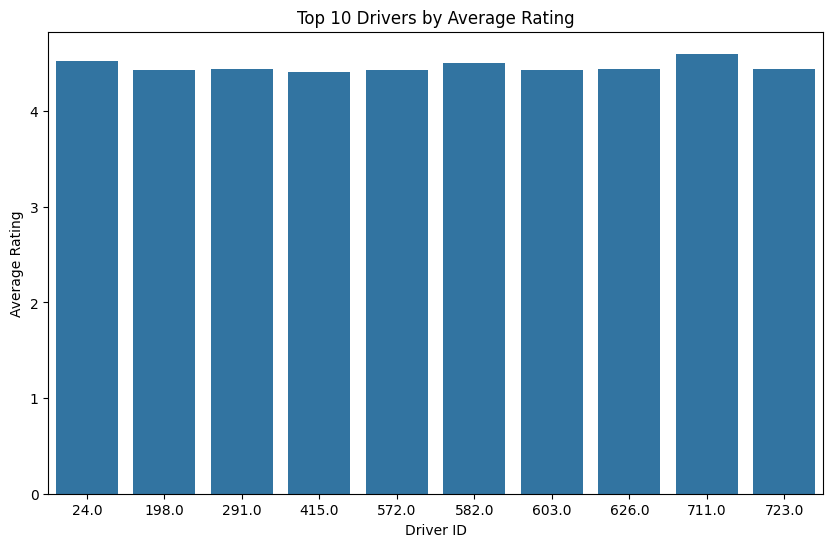

In [ ]:
# Rata-rata rating per pengemudi
avg_rating_per_driver = combined_df.groupby('driver_id')['rating'].mean().reset_index()

# Visualisasi rata-rata rating per pengemudi
plt.figure(figsize=(10, 6))
sns.barplot(x='driver_id', y='rating', data=avg_rating_per_driver.sort_values(by='rating', ascending=False).head(10))
plt.title('Top 10 Drivers by Average Rating')
plt.xlabel('Driver ID')
plt.ylabel('Average Rating')
plt.show()

Rating 4.0: 38.1% (8016 drivers)
Rating 5.0: 30.9% (6495 drivers)
Rating 3.0: 24.1% (5078 drivers)
Rating 2.0: 6.2% (1308 drivers)
Rating 1.0: 0.6% (134 drivers)


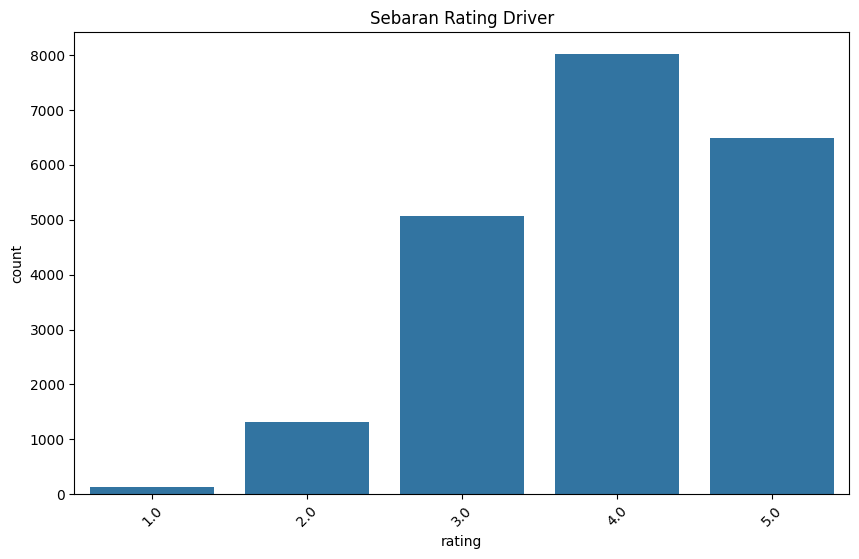

In [ ]:
total_ratings = len(combined_df)
rating_counts = combined_df['rating'].value_counts()

for rating, count in rating_counts.items():
    percentage = (count / total_ratings) * 100
    print(f"Rating {rating}: {percentage:.1f}% ({count} drivers)")

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='rating')
plt.title('Sebaran Rating Driver')
plt.xticks(rotation=45)
plt.show()

#**RFM**

In [ ]:
# Define the reference date (usually the most recent date in the dataset + 1)
reference_date = combined_df['ride_timestamp'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = combined_df.groupby('customer_id').agg(
    Recency=('ride_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('customer_id', 'count'),
    Monetary=('fare_amount', 'sum')
).reset_index()

# RFM Score Calculation (1 to 5 scale)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F'] = pd.cut(rfm['Frequency'], bins=[0, 1, 2, 4, 6, rfm['Frequency'].max()], labels=[1, 2, 3, 4, 5], include_lowest=True)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a total score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)


In [ ]:
# Define segments based on RFM score
def segment_customer(row):
    if row['RFM_Score'] >= 9:
        return 'Champions'
    elif row['RFM_Score'] >= 7:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 5:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 3:
        return 'At Risk'
    else:
        return 'New Customers'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

# Print the output of customer segments
print(rfm[['customer_id', 'RFM_Score', 'Customer_Segment']])

      customer_id  RFM_Score     Customer_Segment
0             1.0         10            Champions
1             2.0         13            Champions
2             3.0          9            Champions
3             5.0         12            Champions
4             6.0          9            Champions
...           ...        ...                  ...
8573      10994.0          4              At Risk
8574      10996.0          6  Potential Loyalists
8575      10997.0         12            Champions
8576      10998.0          7      Loyal Customers
8577      11000.0         12            Champions

[8578 rows x 3 columns]


In [ ]:
# Hitung jumlah pelanggan per segmen
segment_counts = rfm.groupby('Customer_Segment').size()

# Tampilkan hasil
print("Total Jumlah Pelanggan per Segmen:")
print(segment_counts)

Total Jumlah Pelanggan per Segmen:
Customer_Segment
At Risk                1313
Champions              4091
Loyal Customers        1750
Potential Loyalists    1424
dtype: int64


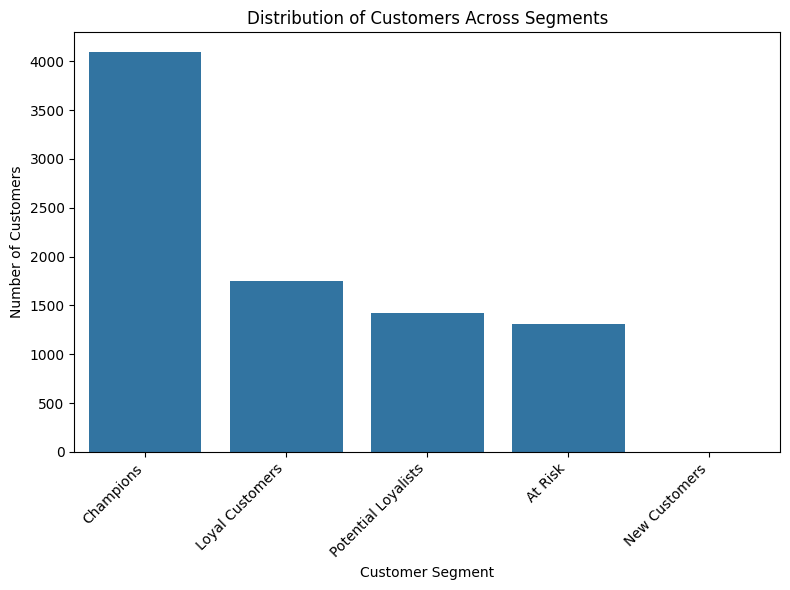

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Segment', data=rfm, order=['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'New Customers'])  # Explicit order for clarity
plt.title('Distribution of Customers Across Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()